In [3]:
library(tidyverse)
library(repr)
library(readxl)
library(scales)

In [1]:
##Tidying

sessions_path <- "sessions.csv"
sessions_data <- read.csv(sessions_path)

players_path <- "players.csv"
players_data <- read.csv(players_path)

players <- rename(players_data, "Experience" = experience, "Subscribed" = subscribe, "Hashed_email" = hashedEmail, "Hours_played" = played_hours, "Name" = name, "Gender" = gender)
sessions <- rename(sessions_data, "Hashed_email" = hashedEmail, "Start time" = start_time, "End time" = end_time, "Original start time" = original_start_time, "Original end time" = original_end_time)

write.csv(players, "tidy_players.csv")
write.csv(sessions, "tidy_sessions.csv")

Warning message in file(file, "rt"):
“cannot open file 'sessions.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


The players.csv data describes a list of Minecraft players, with each player being an observation. The columns are: experience, subscribed, hashed email, hours played, name, gender, and age. For the purposes of organization, the hashed email could be disregarded for now. Experience level is represented in five categories (beginner, amateur, regular, veteran, pro). Subscribed is a TRUE/FALSE statement, hours played and age are integers, and name and gender seem to be user-entered characters. Gender is user-identified and thus can’t be easily organized in male/female; this makes for a more interesting analysis.

Initial problems encountered started with the hashed email. I figured this is needed for logistics of identification with the actual research project, but it was such a glaring column. I decided to disregard it for now; of course, it’s still in the original players.csv file, but as I mess around with the data and learn more about it, the hashed email, and maybe even the names, aren’t needed.

Experience,Subscribed,Hours_played,Name,Gender,Age
<chr>,<lgl>,<dbl>,<chr>,<chr>,<int>
Pro,TRUE,30.3,Morgan,Male,9
Veteran,TRUE,3.8,Christian,Male,17
Veteran,FALSE,0.0,Blake,Male,17
Amateur,TRUE,0.7,Flora,Female,21
Regular,TRUE,0.1,Kylie,Male,21
Amateur,TRUE,0.0,Adrian,Female,17
Regular,TRUE,0.0,Luna,Female,19
Amateur,FALSE,0.0,Emerson,Male,21
Amateur,TRUE,0.1,Natalie,Male,47


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


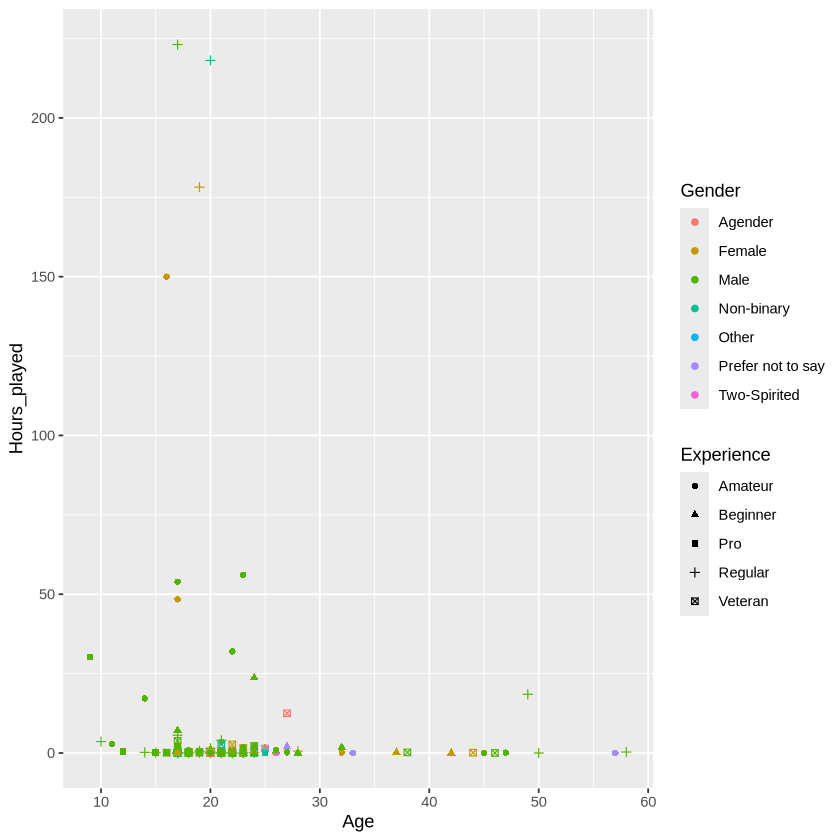

In [5]:
##Playing with visualization

select(players, Experience, Subscribed, Hours_played, Name, Gender, Age)
ggplot(players, aes(x = Age, y = Hours_played, color = Gender, shape = Experience)) +
    geom_point()

Another issue is the distribution of the data. A vast majority of observations have hours played values under 1, such that when I looked at the initial table, it was almost all 0-1, with a few values in the 30-40 range every once and a while. I caught on immediately that this would cause some problems with visualization, but quickly decided to use the scale_y_log10() function.

Warning message in scale_y_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
Warning message:
“The shape palette can deal with a maximum of 6 discrete values because more
than 6 becomes difficult to discriminate
ℹ you have requested 7 values. Consider specifying shapes manually if you need
  that many have them.”
Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_point()`).”


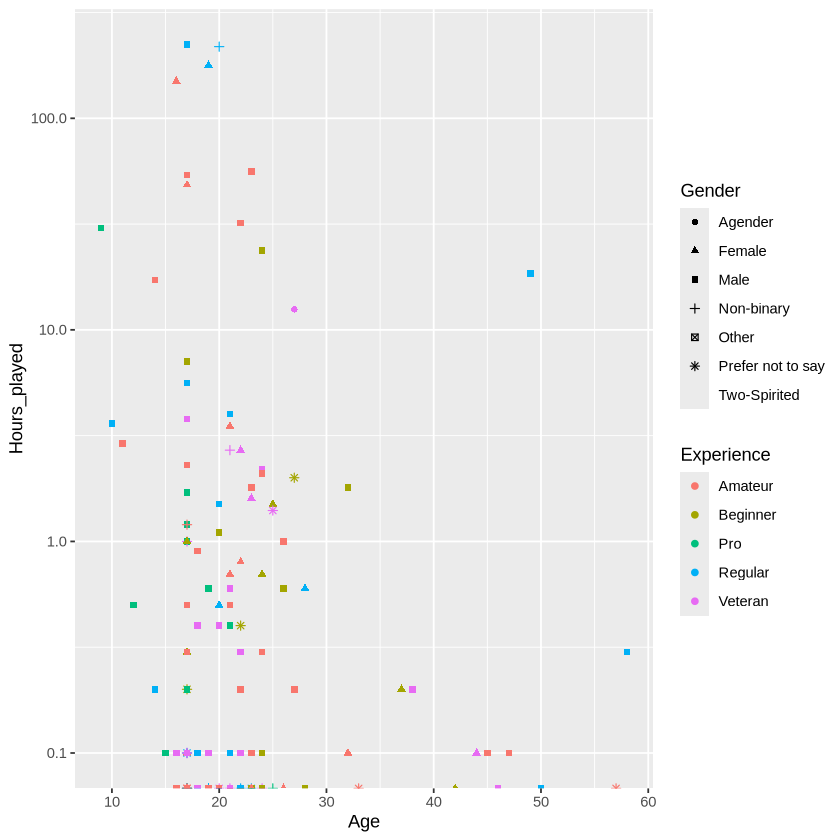

In [8]:
ggplot(players, aes(x = Age, y = Hours_played, shape = Gender, color = Experience)) +
    geom_point() +
    scale_y_log10(labels = label_comma())

Scaled logarithmically, it's easier to see the differences in hours played. From here, it looks like the majority of players have less than an hour of playtime, and only a few have greater than ten hours. From here, it's also easy to see that the data is dominated by male players ages 15-25. However, while younger players seem to have higher hours played, it doesn't look like gender is a very significant determinant. This is something I want to look into further.

Next, I'll continue looking at demographic differences. What variables impact the hours played variable?

I want to addess question 2: "We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts". My initial thoughts are that age will be the most significant factor, with younger players more likely to contribute. Gender and experience are, interestingly, less significant attributes. My more specific question is, how can gender and experience affect hours played?

Because there's significant correlation between age and hours played, the KNN classification system would be helpful in answering this question.